In [ ]:
save_location = Path("/storage/group/izg5139/default/external/zimie")
save_location.mkdir(exist_ok=True)
fig.savefig(f"{save_location}/Z3_avoidmers_per_satellite_compartment.png", bbox_inches='tight')

In [1]:
import pandas as pd
import pybedtools
from pybedtools import BedTool

pybedtools.helpers.set_tempdir("/storage/home/nmc6088/scratch")

In [2]:
!head /storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2_abacaba_words_length_70.liftover.bed

chr1	596746	596818
chr1	596747	596818
chr1	596748	596818
chr1	666019	666109
chr1	666020	666109
chr1	666021	666109
chr1	666022	666109
chr1	666023	666109
chr1	666024	666109
chr1	666025	666109


In [3]:
rep_times = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/bg02es_replitime.deciles.bed",
                         header=None,
                         names=["seqID", "start", "end", "score", "rank"])
rep_times

,seqID,start,end,score,rank
0,chr1,24499,85499,49.5095,6
1,chr1,85499,201499,53.3379,7
2,chr1,201499,224499,49.5095,6
3,chr1,224499,243499,46.1936,5
4,chr1,243499,259499,38.8113,4
...,...,...,...,...,...
20018,chrX,152841499,152889499,62.9879,8
20019,chrX,152889499,152931499,67.8677,9
20020,chrX,152931499,153303499,71.8096,10
20021,chrX,153303499,153409499,67.8677,9


In [4]:
df_liftover = pd.read_table("/storage/group/izg5139/default/DNA-Avoidmers/patterns/pattern_merged_abacaba/chm13v2.0_abacaba_words_length_50.liftover.test.bed",
                  header=None,
                  names=["seqID", "start", "end"]
                  )
df_liftover

,seqID,start,end
0,chr1,231011,231071
1,chr1,231030,231082
2,chr1,231289,231343
3,chr1,231317,231368
4,chr1,235306,235364
...,...,...,...
4506340,chrY,59361356,59361407
4506341,chrY,59361544,59361598
4506342,chrY,59362208,59362269
4506343,chrY,59362302,59362355


In [30]:
df_liftover_bed = BedTool.from_dataframe(df_liftover).sort().merge()
df_liftover_bed

<BedTool(/storage/home/nmc6088/scratch/pybedtools.1pu5s0_l.tmp)>

In [39]:
!wc -l /storage/home/nmc6088/scratch/pybedtools.1pu5s0_l.tmp

3311894 /storage/home/nmc6088/scratch/pybedtools.1pu5s0_l.tmp


In [31]:
rep_times_bed = BedTool.from_dataframe(rep_times[["seqID", "start", "end", "rank"]])

In [32]:
rep_times_avoidmers = pd.read_table(
                            df_liftover_bed.intersect(rep_times_bed, wo=True).fn,
                            header=None,
                            names=["seqID", "start", "end", "chromosome", "regionStart", "regionEnd", "rank", "overlap"]
            )
rep_times_avoidmers

,seqID,start,end,chromosome,regionStart,regionEnd,rank,overlap
0,chr1,228506,228557,chr1,224499,243499,5,51
1,chr1,229644,229699,chr1,224499,243499,5,55
2,chr1,231011,231082,chr1,224499,243499,5,71
3,chr1,231289,231368,chr1,224499,243499,5,79
4,chr1,235306,235364,chr1,224499,243499,5,58
...,...,...,...,...,...,...,...,...
3230189,chrX,154987973,154988024,chrX,154920499,154990499,3,51
3230190,chrX,154988125,154988177,chrX,154920499,154990499,3,52
3230191,chrX,154989961,154990037,chrX,154920499,154990499,3,76
3230192,chrX,154990065,154990140,chrX,154920499,154990499,3,75


In [40]:
rep_times_avoidmers.overlap.sum()

194936006

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
rep_times_avoidmers_grouped = rep_times_avoidmers.groupby(["chromosome", "regionStart", "regionEnd"], as_index=False)\
                .agg({
                      "rank": "first",
                      "overlap": "sum",
                      "seqID": "count",
                     })\
                .assign(compLength=lambda ds: ds["regionEnd"] - ds["regionStart"])\
                .groupby("rank", as_index=False)\
                .agg({
                        "overlap": "sum",
                        "compLength": "sum",
                    })\
                .assign(density=lambda ds: 1e2 * ds["overlap"].div(ds["compLength"]))

rep_times_avoidmers_grouped

,rank,overlap,compLength,density
0,1,13818101,304048000,4.544710
1,2,17078561,281301000,6.071276
2,3,18057389,283270000,6.374621
3,4,18841900,282992000,6.658103
4,5,19484844,284726000,6.843367
5,6,20769465,285290000,7.280124
6,7,21415890,285334000,7.505551
7,8,21689514,286149000,7.579797
8,9,21600870,283451000,7.620672
9,10,22179472,282525000,7.850446


In [70]:
rep_times_avoidmers_grouped.assign(order=lambda ds: -ds['rank'])

,rank,overlap,compLength,density,order
0,1,13818101,304048000,4.544710,-1
1,2,17078561,281301000,6.071276,-2
2,3,18057389,283270000,6.374621,-3
3,4,18841900,282992000,6.658103,-4
4,5,19484844,284726000,6.843367,-5
5,6,20769465,285290000,7.280124,-6
6,7,21415890,285334000,7.505551,-7
7,8,21689514,286149000,7.579797,-8
8,9,21600870,283451000,7.620672,-9
9,10,22179472,282525000,7.850446,-10


[]

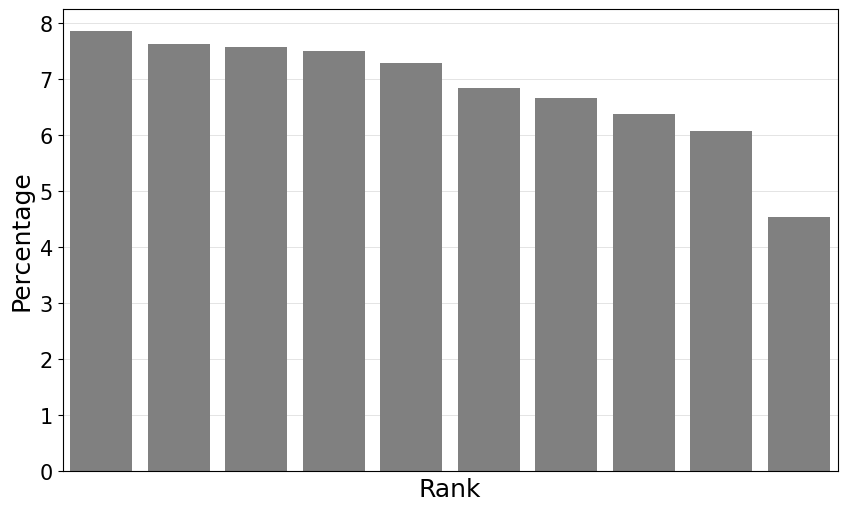

In [74]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.barplot(
            data=rep_times_avoidmers_grouped.assign(order=lambda ds: -ds['rank']),
            x="order",
            y="density",
            ax=ax,
            color="gray", 
          #  order="order",        
    )
# ax.set_ylim(ymin=-0.1)
# ax.annotate(xy=(1.0, 0.0), text="Early -> Late")
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_axisbelow(True)
ax.set_xlabel("Rank")
ax.set_ylabel("Percentage")
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.tick_params(axis="both", labelsize=15)
ax.set_xticks([])